# Feature Engineering

**importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score
#%pip install xverse

from xverse.transformer import WOE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**load the extracted dataset**

In [2]:
def load_data2(file_path):
    return pd.read_csv(file_path)

# Load data2
file_path = '../data/data2.csv'
data = load_data2(file_path)

In [3]:
def data2_columnROW(data):
    num_rows, num_cols = data.shape
    data_types = data.dtypes

    print(f"Number of rows: {num_rows}\nNumber of columns: {num_cols}\n")
    print("Data types:")
    print(data_types)
    print("\n")

# Display overview of rows and columns
data2_columnROW(data)

Number of rows: 95662
Number of columns: 16

Data types:
TransactionId             int64
BatchId                   int64
AccountId                 int64
SubscriptionId            int64
CustomerId                int64
CurrencyCode             object
CountryCode               int64
ProviderId                int64
ProductId                 int64
ProductCategory          object
ChannelId                 int64
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object




# 1. Create Aggregate Features

- **Total Transaction Amount:** Sum of all transaction amounts for each customer.
- **Average Transaction Amount:** Average transaction amount per customer.
- **Transaction Count:** Number of transactions per customer.
- **Standard Deviation of Transaction Amounts:** Variability of transaction amounts per customer.


In [4]:
def create_aggregate_features(data):
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
    aggregate_features = data.groupby('AccountId').agg(
        TotalTransactionAmount=('Amount', 'sum'),
        AverageTransactionAmount=('Amount', 'mean'),
        TransactionCount=('Amount', 'count'),
        StdDevTransactionAmount=('Amount', 'std')
    ).reset_index()
    return aggregate_features

# Feature Engineering
aggregate_features = create_aggregate_features(data)
print("Aggregate Features:")
print(aggregate_features.head())

Aggregate Features:
   AccountId  TotalTransactionAmount  AverageTransactionAmount  \
0          1                 70000.0              23333.333333   
1          2                 70000.0              35000.000000   
2          3                  5000.0               5000.000000   
3          4                 62000.0              62000.000000   
4          5                 40000.0              20000.000000   

   TransactionCount  StdDevTransactionAmount  
0                 3              5773.502692  
1                 2                 0.000000  
2                 1                      NaN  
3                 1                      NaN  
4                 2                 0.000000  


# Extract Features

- **Transaction Hour:** The hour of the day when the transaction occurred.
- **Transaction Day:** The day of the month when the transaction occurred.
- **Transaction Month:** The month when the transaction occurred.
- **Transaction Year:** The year when the transaction occurred.


In [5]:
def extract_time_features(data):
    data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
    data['TransactionHour'] = data['TransactionStartTime'].dt.hour
    data['TransactionDay'] = data['TransactionStartTime'].dt.day
    data['TransactionMonth'] = data['TransactionStartTime'].dt.month
    data['TransactionYear'] = data['TransactionStartTime'].dt.year
    return data

In [6]:
# Feature Extraction
data = extract_time_features(data)
print("Data with Time Features:")
print(data[['TransactionStartTime', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())

Data with Time Features:
       TransactionStartTime  TransactionHour  TransactionDay  \
0 2018-11-15 02:18:49+00:00                2              15   
1 2018-11-15 02:19:08+00:00                2              15   
2 2018-11-15 02:44:21+00:00                2              15   
3 2018-11-15 03:32:55+00:00                3              15   
4 2018-11-15 03:34:21+00:00                3              15   

   TransactionMonth  TransactionYear  
0                11             2018  
1                11             2018  
2                11             2018  
3                11             2018  
4                11             2018  


# Encode Categorical Variables
Convert categorical variables into numerical format by using:
 
 - **One-Hot Encoding:** Converts categorical values into binary vectors.
 - **Label Encoding:** Assigns a unique integer to each category.


In [7]:
def Identify_categorical_features(data):
 categorical_features = data.select_dtypes(include=['object']).columns.tolist()
 print(f"Categorical Features: {categorical_features}")
 
Identify_categorical_features(data)

Categorical Features: ['CurrencyCode', 'ProductCategory']


**One-Hot Encoding**

In [8]:
# Encode Categorical Variables: One-Hot Encoding
def one_hot_encode(data, categorical_features):
    data = pd.get_dummies(data, columns=categorical_features)
    return data

categorical_features = data.select_dtypes(include=['object']).columns.tolist()
data_one_hot_encoded = one_hot_encode(data, categorical_features)
print("One-Hot Encoded Data:")
print(data_one_hot_encoded.head())

One-Hot Encoded Data:
   TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  CountryCode  \
0          76871    36123       3957             887        4406          256   
1          73770    15642       4841            3829        4406          256   
2          26203    53941       4229             222        4683          256   
3            380   102363        648            2185         988          256   
4          28195    38780       4841            3829         988          256   

   ProviderId  ProductId  ChannelId   Amount  ...  CurrencyCode_UGX  \
0           6         10          3   1000.0  ...              True   
1           4          6          2    -20.0  ...              True   
2           6          1          3    500.0  ...              True   
3           1         21          3  20000.0  ...              True   
4           4          6          2   -644.0  ...              True   

  ProductCategory_airtime  ProductCategory_data_bundles  \
0    

**Label Encoding**

In [9]:
# Encode Categorical Variables: Label Encoding
def label_encode(data, categorical_features):
    le = LabelEncoder()
    for feature in categorical_features:
        data[feature] = le.fit_transform(data[feature].astype(str))
    return data

data_label_encoded = label_encode(data, categorical_features)
print("Label Encoded Data:")
print(data_label_encoded.head())

Label Encoded Data:
   TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0          76871    36123       3957             887        4406   
1          73770    15642       4841            3829        4406   
2          26203    53941       4229             222        4683   
3            380   102363        648            2185         988   
4          28195    38780       4841            3829         988   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0             0          256           6         10                0   
1             0          256           4          6                2   
2             0          256           6          1                0   
3             0          256           1         21                8   
4             0          256           4          6                2   

   ChannelId   Amount  Value      TransactionStartTime  PricingStrategy  \
0          3   1000.0   1000 2018-11-15 02:18:49+00:00         

In [10]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,76871,36123,3957,887,4406,0,256,6,10,0,3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,73770,15642,4841,3829,4406,0,256,4,6,2,2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,26203,53941,4229,222,4683,0,256,6,1,0,3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,380,102363,648,2185,988,0,256,1,21,8,3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,28195,38780,4841,3829,988,0,256,4,6,2,2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [11]:
data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
95657,89881,96668,4841,3829,3078,0,256,4,6,2,2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,9,13,2,2019
95658,91597,3503,3439,2643,3874,0,256,6,10,0,3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,9,13,2,2019
95659,82501,118602,4841,3829,3874,0,256,4,6,2,2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,9,13,2,2019
95660,136354,70924,1346,652,1709,0,256,6,19,7,3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,10,13,2,2019
95661,35670,29317,4841,3829,1709,0,256,4,6,2,2,-60.0,60,2019-02-13 10:01:28+00:00,2,0,10,13,2,2019


# Handle Missing Values
- Use imputation or Removal to handle missing values

**Imputation:** Filling missing values with mean, median, mode, or using more methods like KNN imputation.

**Removal:** Removing rows or columns with missing values if they are few.

**Using Imputation**

In [12]:
def handle_missing_values(data, strategy='mean'):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    imputer = SimpleImputer(strategy=strategy)
    data[numerical_features] = imputer.fit_transform(data[numerical_features])
    return data

# Handle Missing Values
data = handle_missing_values(data, strategy='mean')

In [13]:
def identify_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values[missing_values > 0])
    print("\n")
# Identify missing values
identify_missing_values(data)

Missing Values:
Series([], dtype: int64)




In [14]:

data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
TransactionYear         0
dtype: int64

# Normalize/Standardize Numerical Features
- Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.


**Normalization:** Scales the data to a range of [0, 1].

**Standardization:** Scales the data to have a mean of 0 and a standard deviation of 1.


**Normalize Features**

In [16]:
def normalize_features(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    scaler = MinMaxScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data

# Normalize Features
normalized_data = normalize_features(data.copy())
print("Normalized Data:")
print(normalized_data.head())

Normalized Data:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       0.546417  0.258949   0.817355        0.183078    0.589061   
1       0.524374  0.112122   1.000000        0.791684    0.589061   
2       0.186252  0.386684   0.873554        0.045511    0.626103   
3       0.002694  0.733818   0.133678        0.451593    0.131987   
4       0.200412  0.277996   1.000000        0.791684    0.131987   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0           0.0          0.0         1.0   0.346154             0.00   
1           0.0          0.0         0.6   0.192308             0.25   
2           0.0          0.0         1.0   0.000000             0.00   
3           0.0          0.0         0.0   0.769231             1.00   
4           0.0          0.0         0.6   0.192308             0.25   

   ChannelId    Amount     Value      TransactionStartTime  PricingStrategy  \
0       0.50  0.092004  0.000101 2018-11-15 02:18:49+00:

**Standardize Features**

In [17]:
def standardize_features(data):
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data

# Standardize Features
standardized_data = standardize_features(data.copy())
print("Standardized Data:")
print(standardized_data.head())

Standardized Data:
   TransactionId   BatchId  AccountId  SubscriptionId  CustomerId  \
0       0.160893 -0.847664   0.381677       -1.650828    0.774769   
1       0.084563 -1.352296   0.948332        0.622801    0.774769   
2      -1.086272 -0.408646   0.556032       -2.164752    0.942550   
3      -1.721890  0.784424  -1.739433       -0.647711   -1.295536   
4      -1.037240 -0.782198   0.948332        0.622801   -1.295536   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0           0.0          0.0    1.025848   0.554336        -0.799047   
1           0.0          0.0   -0.502027  -0.304790         0.491064   
2           0.0          0.0    1.025848  -1.378697        -0.799047   
3           0.0          0.0   -2.793841   2.916933         4.361398   
4           0.0          0.0   -0.502027  -0.304790         0.491064   

   ChannelId    Amount     Value      TransactionStartTime  PricingStrategy  \
0   0.676000 -0.046371 -0.072291 2018-11-15 02:18:49+0

# Default estimator and WoE binning 

- The purpose of any credit scoring system is to classify users as high risk or low-risk. High-risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame. 

- To classify users into high and low risk groups, we can use the RFMS (Recency, Frequency, Monetary, and Seasonality) model. What is RFMS? RFMS stands for:

**Recency (R):** The number of days since a customer's last transaction. It helps in understanding how recently the customer was active. 

**Frequency (F):** The total number of transactions made by the customer. It indicates how often the customer transacts. 

**Monetary (M):** The total amount spent by the customer. It shows how much the customer spends. 

**Seasonality (S):** The most common month in which the customer transacts. It helps in understanding patterns and seasonality in customer transactions.

- Construct a default estimator (proxy)
    - By visualizing all transactions in the RFMS space, establish a boundary where users are classified as high and low RFMS scores.
    - Assign all users the good and bad label


# RFMS Calculation

In [18]:
from datetime import datetime
# Example functions to calculate RFMS components
# Recency measures how recently a customer made a transaction.
def calculate_recency(data, date_column='TransactionStartTime'):
    data[date_column] = pd.to_datetime(data[date_column])
    max_date = data[date_column].max()#Finds the most recent transaction date.
    data['Recency'] = (max_date - data[date_column]).dt.days #Calculates the number of days since the last transaction for each transaction.
    return data

#Frequency measures how often a customer makes transactions.
def calculate_frequency(data, id_column='CustomerId'):
    frequency = data.groupby(id_column).size().reset_index(name='Frequency')#Groups the data by CustomerId and counts the number of transactions for each customer.
    data = data.merge(frequency, on=id_column)
    return data

#Monetary measures the total amount spent by a customer.
def calculate_monetary(data, id_column='CustomerId', amount_column='Amount'):
    monetary = data.groupby(id_column)[amount_column].sum().reset_index(name='Monetary')# Groups the data by CustomerId and sums the transaction amounts for each customer
    data = data.merge(monetary, on=id_column)
    return data

#Seasonality measures the most common month of transactions for each customer.
def calculate_seasonality(data, date_column='TransactionStartTime'):
    data[date_column] = pd.to_datetime(data[date_column])
    data['Month'] = data[date_column].dt.month
    # Groups the data by CustomerId and finds the most frequent transaction month for each customer.
    seasonality = data.groupby('CustomerId')['Month'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Seasonality')
    data = data.merge(seasonality, on='CustomerId')
    return data

# Calculate RFMS
data = calculate_recency(data)
data = calculate_frequency(data)
data = calculate_monetary(data)
data = calculate_seasonality(data)

In [19]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,Month,Seasonality
0,76871.0,36123.0,3957.0,887.0,4406.0,0.0,256.0,6.0,10.0,0.0,...,0.0,2.0,15.0,11.0,2018.0,90,119,109921.75,11,11
1,73770.0,15642.0,4841.0,3829.0,4406.0,0.0,256.0,4.0,6.0,2.0,...,0.0,2.0,15.0,11.0,2018.0,90,119,109921.75,11,11
2,26203.0,53941.0,4229.0,222.0,4683.0,0.0,256.0,6.0,1.0,0.0,...,0.0,2.0,15.0,11.0,2018.0,90,2,1000.00,11,11
3,380.0,102363.0,648.0,2185.0,988.0,0.0,256.0,1.0,21.0,8.0,...,0.0,3.0,15.0,11.0,2018.0,90,38,228727.20,11,12
4,28195.0,38780.0,4841.0,3829.0,988.0,0.0,256.0,4.0,6.0,2.0,...,0.0,3.0,15.0,11.0,2018.0,90,38,228727.20,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881.0,96668.0,4841.0,3829.0,3078.0,0.0,256.0,4.0,6.0,2.0,...,0.0,9.0,13.0,2.0,2019.0,0,573,2438140.00,2,2
95658,91597.0,3503.0,3439.0,2643.0,3874.0,0.0,256.0,6.0,10.0,0.0,...,0.0,9.0,13.0,2.0,2019.0,0,43,58499.60,2,2
95659,82501.0,118602.0,4841.0,3829.0,3874.0,0.0,256.0,4.0,6.0,2.0,...,0.0,9.0,13.0,2.0,2019.0,0,43,58499.60,2,2
95660,136354.0,70924.0,1346.0,652.0,1709.0,0.0,256.0,6.0,19.0,7.0,...,0.0,10.0,13.0,2.0,2019.0,0,524,851985.00,2,1


**Plot distribution of Recency**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
%matplotlib inline

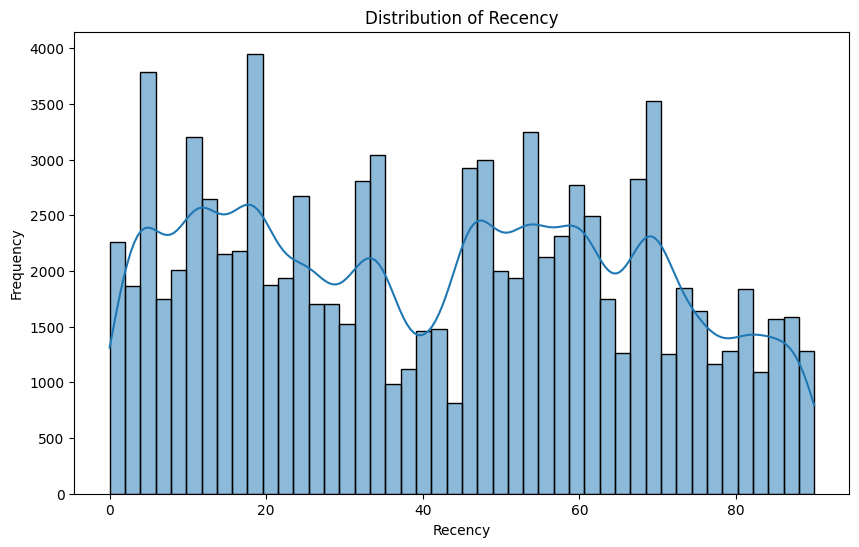

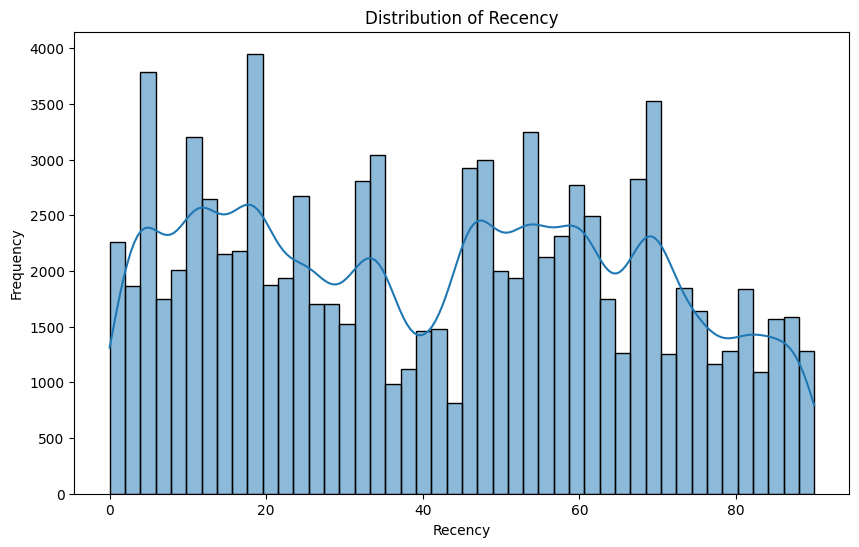

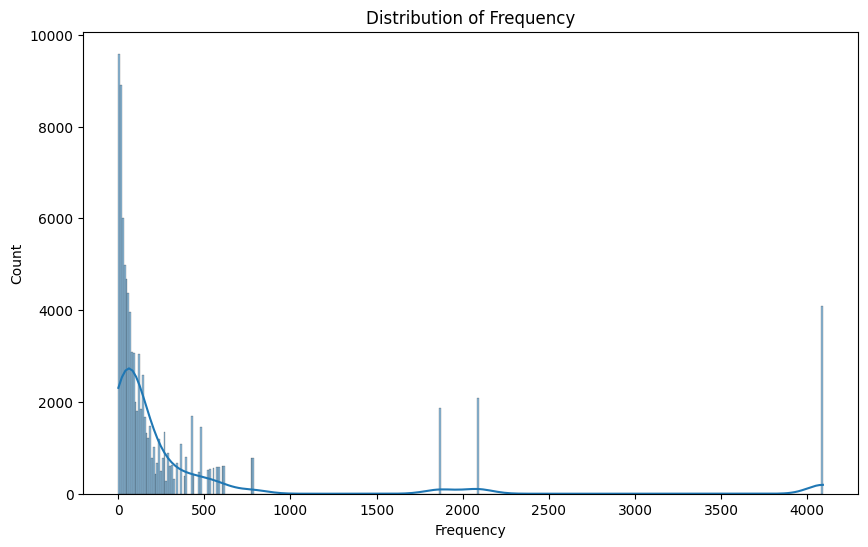

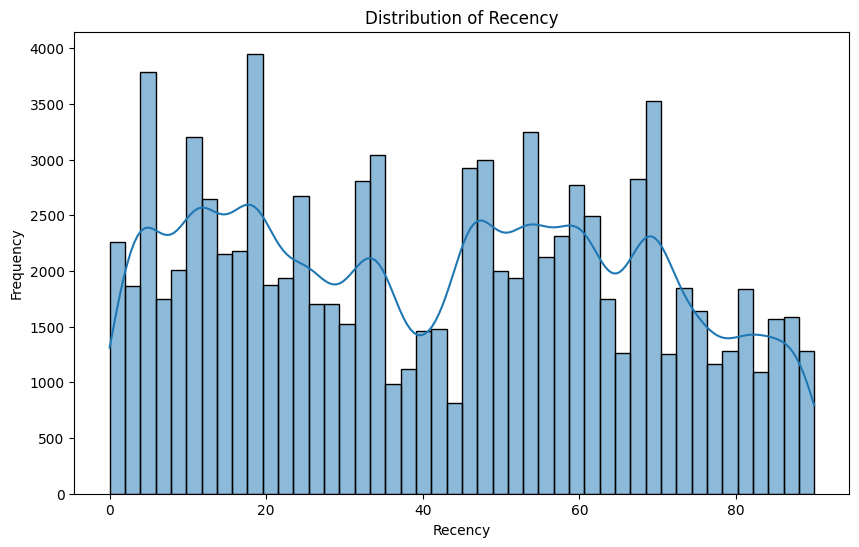

In [29]:
def plot_recency_distribution(data, column='Recency'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Recency')
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.show()

plot_recency_distribution(data)

**Plot distribution of Frequency**

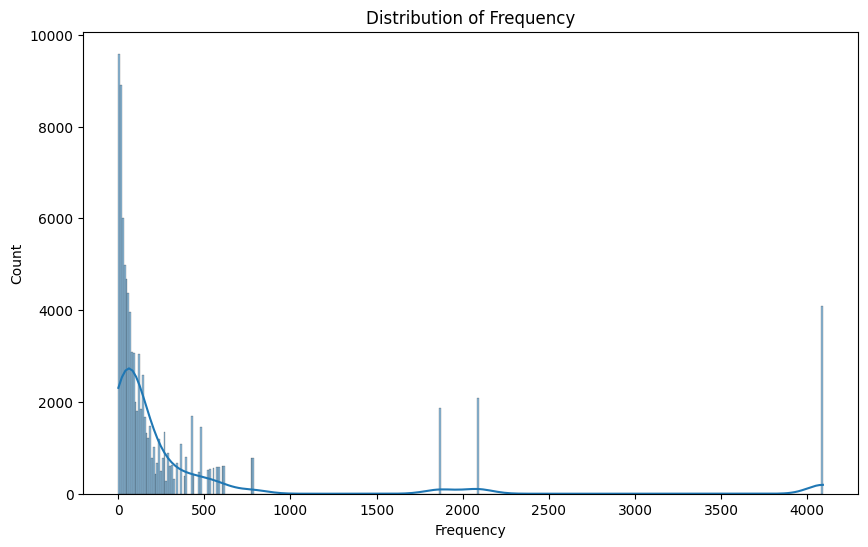

In [30]:
def plot_frequency_distribution(data, column='Frequency'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.show()


plot_frequency_distribution(data)

**Plot distribution of Monetary**

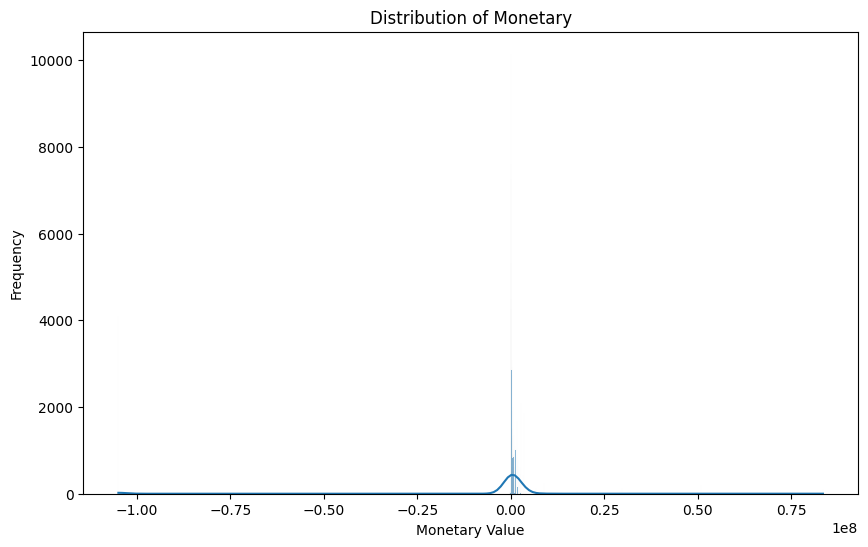

In [31]:
def plot_monetary_distribution(data, column='Monetary'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title('Distribution of Monetary')
    plt.xlabel('Monetary Value')
    plt.ylabel('Frequency')
    plt.show()


plot_monetary_distribution(data)

**Plot distribution of Seasonality (Month)**

In [33]:
def plot_seasonality_distribution(data, column='Seasonality'):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column])
    plt.title('Distribution of Seasonality (Month)')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.show()
 

plot_seasonality_distribution(data)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001D8FD421DA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D905A46020> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
print(data[['Recency', 'Frequency', 'Monetary','Seasonality']].describe())

            Recency     Frequency      Monetary   Seasonality
count  95662.000000  95662.000000  9.566200e+04  95662.000000
mean      41.801175    392.982982 -3.599090e+06      7.449447
std       25.588896    878.631072  2.180271e+07      5.229396
min        0.000000      1.000000 -1.049000e+08      1.000000
25%       18.000000     32.000000  6.000000e+04      1.000000
50%       43.000000     93.000000  2.015113e+05     11.000000
75%       63.000000    273.000000  7.089360e+05     12.000000
max       90.000000   4091.000000  8.345124e+07     12.000000


# Assign all users the good and bad label

Classify users as "good" or "bad" based on their RFMS scores. In credit scoring, customers with lower recency, higher frequency, and greater monetary values are generally considered less risky, while those with higher recency and lower frequency may be seen as higher risk.

**Recency Thresholds:** Users with a recency of 18 days or less are labeled as "good," while those with 63 days or more are classified as "bad."

**Frequency Thresholds:** Users who have completed 273 or more transactions are categorized as "good," while those with 32 or fewer transactions are labeled "bad."

**Monetary Thresholds:** Users with a monetary value of 708,936 units or more are deemed "good," whereas those with 60,000 units or less are considered "bad." Users who don’t fit clearly into these "good" or "bad" thresholds are classified as "average."

**Threshold Settings for Recency:**

   - **Good:** Recency ≤ 25th percentile (18 days)
   - **Bad:** Recency > 75th percentile (63 days)

**Threshold Settings for Frequency:**

   - **Good:** Frequency ≥ 75th percentile (273 transactions)
   - **Bad:** Frequency ≤ 25th percentile (32 transactions)

**Threshold Settings for Monetary Value:**

   - **Good:** Monetary ≥ 75th percentile (708,936 units)
   - **Bad:** Monetary ≤ 25th percentile (60,000 units)

In [36]:
def classify_users(data, recency_threshold, frequency_threshold, monetary_threshold):
    conditions = [
        (data['Recency'] <= recency_threshold['good']) &
        (data['Frequency'] >= frequency_threshold['good']) &
        (data['Monetary'] >= monetary_threshold['good']),
        
        (data['Recency'] > recency_threshold['bad']) |
        (data['Frequency'] <= frequency_threshold['bad']) |
        (data['Monetary'] <= monetary_threshold['bad'])
    ]
    
    choices = ['good', 'bad']
    data['RFMS_Score'] = np.select(conditions, choices, default='average')
    return data

# Define thresholds based on quartiles
thresholds = {
    'recency': {'good': 18, 'bad': 63},
    'frequency': {'good': 273, 'bad': 32},
    'monetary': {'good': 708936, 'bad': 60000}
}

In [37]:
# Classify users
data = classify_users(data, thresholds['recency'], thresholds['frequency'], thresholds['monetary'])

# Check the results
data['RFMS_Score'].value_counts()

RFMS_Score
bad        47839
average    43600
good        4223
Name: count, dtype: int64

In [38]:
def classify_users(data, recency_threshold, frequency_threshold, monetary_threshold, seasonality_threshold):
    conditions = [
        (data['Recency'] <= recency_threshold['good']) &
        (data['Frequency'] >= frequency_threshold['good']) &
        (data['Monetary'] >= monetary_threshold['good']) &
        (data['Seasonality'].isin(seasonality_threshold['high_season'])),
        
        (data['Recency'] > recency_threshold['bad']) |
        (data['Frequency'] <= frequency_threshold['bad']) |
        (data['Monetary'] <= monetary_threshold['bad']) |
        (data['Seasonality'].isin(seasonality_threshold['low_season']))
    ]
    
    choices = ['good', 'bad']
    data['RFMS_Score'] = np.select(conditions, choices, default='average')
    return data

# Define thresholds based on quartiles
thresholds = {
    'recency': {'good': 18, 'bad': 63},
    'frequency': {'good': 273, 'bad': 32},
    'monetary': {'good': 708936, 'bad': 60000},
    'seasonality': {'high_season': [11, 12,10], 'low_season': [1,2, 3, 4, 5, 6, 7, 8, 9]}
}

# Classify users
data = classify_users(data, thresholds['recency'], thresholds['frequency'], thresholds['monetary'], thresholds['seasonality'])

# Check the results
data['RFMS_Score'].value_counts()

RFMS_Score
bad        70306
average    24601
good         755
Name: count, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  float64            
 1   BatchId               95662 non-null  float64            
 2   AccountId             95662 non-null  float64            
 3   SubscriptionId        95662 non-null  float64            
 4   CustomerId            95662 non-null  float64            
 5   CurrencyCode          95662 non-null  float64            
 6   CountryCode           95662 non-null  float64            
 7   ProviderId            95662 non-null  float64            
 8   ProductId             95662 non-null  float64            
 9   ProductCategory       95662 non-null  float64            
 10  ChannelId             95662 non-null  float64            
 11  Amount                95662 non-null  float64            
 12  Valu

In [40]:
# Select RFMS columns
rfms_data = data[['Recency', 'Frequency', 'Monetary']]

# Ensure RFMS columns are numeric
rfms_data = rfms_data.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling them with the mean of the column
rfms_data = rfms_data.fillna(rfms_data.mean())

# Standardize the data
scaler = StandardScaler()
rfms_scaled = scaler.fit_transform(rfms_data)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(rfms_scaled)

# Analyze clusters - select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_means = data.groupby('Cluster')[numeric_columns].mean()
cluster_means

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,Month,Seasonality,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,70296.075909,68234.479161,3263.544867,2899.713765,2953.747267,0.0,256.0,4.698574,7.635328,1.258905,...,12.496698,14.370411,1.359206,2019.000000,17.816958,163.075499,9.420732e+05,1.359206,3.870821,0.0
1,69554.171841,118284.212662,4249.000000,4429.000000,7343.000000,0.0,256.0,4.000000,5.956490,0.000000,...,13.189440,6.209973,6.572476,2018.492789,52.725006,4091.000000,-1.049000e+08,6.572476,12.000000,1.0
2,70436.836939,68538.498059,3375.706103,3016.126492,2924.503074,0.0,256.0,4.675409,7.345383,1.326459,...,12.338942,18.146613,11.362503,2018.034219,62.958249,287.370455,9.123466e+05,11.362503,10.355559,2.0


**Visualize the Clusters**

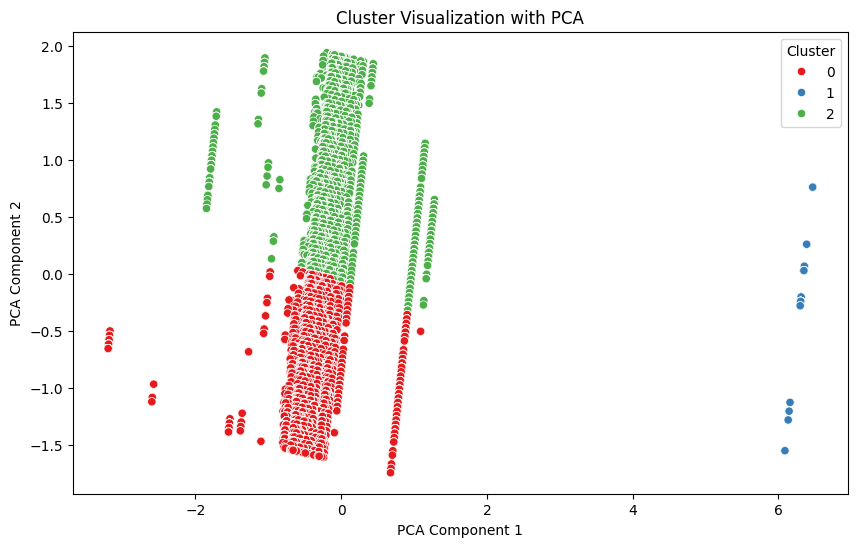

In [41]:
# Visualize clusters in 2D space using first two principal components (PCA)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfms_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Interpretation**:

- Cluster 1 (Blue): High-value customers are labeled as "good". 
- Cluster 0 (Red): Moderate-value customers are labeled as "average". 
- Cluster 2 (Green): Higher risk customers are labeled as "bad".

In [53]:
# Based on the analysis, we assign good and bad labels to the clusters
def assign_risk_labels(cluster):
    if cluster == 1:
        return 'good'
    elif cluster == 0:
        return 'average'
    elif cluster == 2:
        return 'bad'
    
# Apply the function to assign labels
data['Risk_Label'] = data['Cluster'].apply(assign_risk_labels)

# Verify the distribution of labels
print(data['Risk_Label'].value_counts())

# Show the first few rows to verify the labels
data.sample(5)

Risk_Label
bad        47663
average    43908
good        4091
Name: count, dtype: int64


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionMonth,TransactionYear,Recency,Frequency,Monetary,Month,Seasonality,RFMS_Score,Cluster,Risk_Label
51797,17096.0,95081.0,3672.0,2237.0,4113.0,0.0,256.0,6.0,10.0,0.0,...,1.0,2019.0,37,39,122958.0,1,1,bad,0,average
1378,117501.0,84882.0,4841.0,3829.0,3942.0,0.0,256.0,4.0,6.0,2.0,...,11.0,2018.0,88,8,40000.0,11,11,bad,2,bad
51315,101518.0,49822.0,2235.0,907.0,2647.0,0.0,256.0,1.0,15.0,2.0,...,1.0,2019.0,38,57,49694.0,1,1,bad,0,average
33347,131199.0,20086.0,2928.0,4163.0,3353.0,0.0,256.0,6.0,10.0,0.0,...,12.0,2018.0,55,161,149242.0,12,12,average,2,bad
47023,124977.0,134073.0,2109.0,4113.0,2514.0,0.0,256.0,6.0,10.0,0.0,...,12.0,2018.0,44,16,8950.0,12,1,bad,2,bad


In [43]:
# 1. Construct Default Estimator (Proxy)

# Calculate RFMS scores for each user
rfms_scores = data.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (pd.Timestamp.now(tz='UTC') - x.max()).days),
    Frequency=('TransactionId', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Display the first few rows of RFMS scores
rfms_scores.head()

,CustomerId,Recency,Frequency,Monetary
0,1.0,2143,1,-10000.0
1,2.0,2143,1,-10000.0
2,3.0,2143,1,-10000.0
3,4.0,2143,1,-10000.0
4,5.0,2143,1,-10000.0


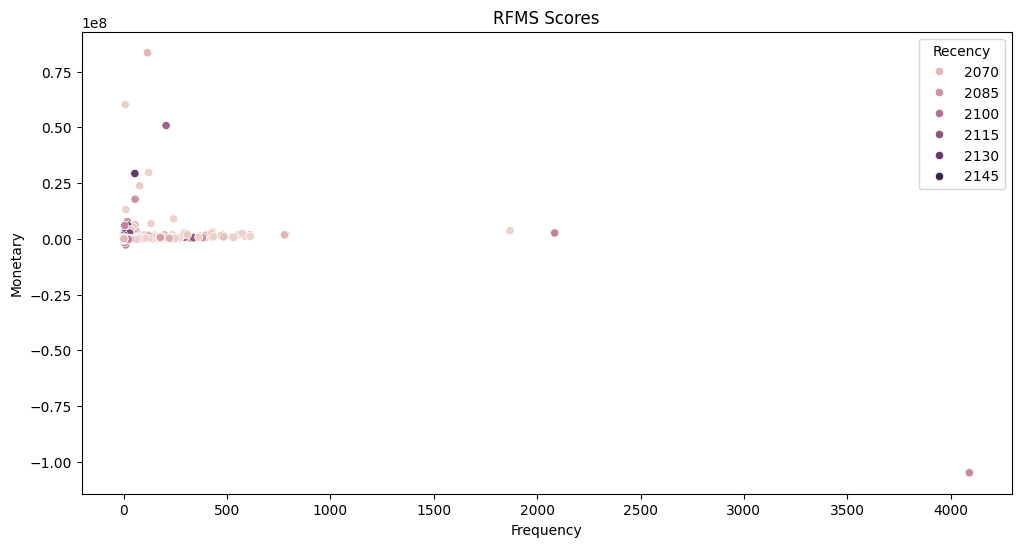

In [44]:
# Visualize RFMS scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()

In [45]:
# 2. Assign Good and Bad Labels
# Define boundary values
high_freq_boundary = rfms_scores['Frequency'].quantile(0.75)
high_monetary_boundary = rfms_scores['Monetary'].quantile(0.75)
low_recency_boundary = rfms_scores['Recency'].quantile(0.25)

# Assign labels based on boundary
rfms_scores['Label'] = 'Good'
rfms_scores.loc[(rfms_scores['Frequency'] <= high_freq_boundary) & 
                (rfms_scores['Monetary'] <= high_monetary_boundary) & 
                (rfms_scores['Recency'] >= low_recency_boundary), 'Label'] = 'Bad'
print(rfms_scores['Label'] .value_counts())
# Display the first few rows of RFMS scores with labels
rfms_scores

Label
Bad     2220
Good    1522
Name: count, dtype: int64


,CustomerId,Recency,Frequency,Monetary,Label
0,1.0,2143,1,-10000.0,Bad
1,2.0,2143,1,-10000.0,Bad
2,3.0,2143,1,-10000.0,Bad
3,4.0,2143,1,-10000.0,Bad
4,5.0,2143,1,-10000.0,Bad
...,...,...,...,...,...
3737,7475.0,2098,3,-6000.0,Bad
3738,7476.0,2093,23,-213400.0,Good
3739,7477.0,2116,1,-2000.0,Bad
3740,7478.0,2072,1,500.0,Bad


# Perform Weight of Evidence (WoE) binning 

In [62]:
# Step 1: Calculate Recency, Frequency, Monetary, and Size metrics

# Assuming you have a dataset named df with the necessary columns
# Calculate Recency: difference between the latest transaction date and each transaction date for each customer
latest_transaction_date = data['TransactionStartTime'].max()
data['Recency'] = (latest_transaction_date - data['TransactionStartTime']).dt.days

# Calculate Frequency: count of transactions for each customer
frequency_df = data.groupby('CustomerId')['TransactionId'].count().reset_index()
frequency_df.rename(columns={'TransactionId': 'Frequency'}, inplace=True)

# Calculate Monetary: total transaction amount for each customer
monetary_df = data.groupby('CustomerId')['Amount'].sum().reset_index()
monetary_df.rename(columns={'Amount': 'Monetary'}, inplace=True)

# Calculate Size: average transaction amount for each customer
size_df = data.groupby('CustomerId')['Amount'].mean().reset_index()
size_df.rename(columns={'Amount': 'Size'}, inplace=True)

# Step 2: Normalize metrics if necessary (you can skip this step if the metrics are already on a similar scale)

# Step 3: Combine the metrics to calculate the RFMS score for each customer
rfms_df = frequency_df.merge(monetary_df, on='CustomerId').merge(size_df, on='CustomerId').merge(data.groupby('CustomerId')['Recency'].min().reset_index(), on='CustomerId')

# Assuming you want to calculate RFMS score using simple arithmetic
rfms_df['RFMS_score'] = (rfms_df['Recency'] * 100) + (rfms_df['Frequency'] * 10) + (rfms_df['Monetary'] * 1) + (rfms_df['Size'] * 0.1)

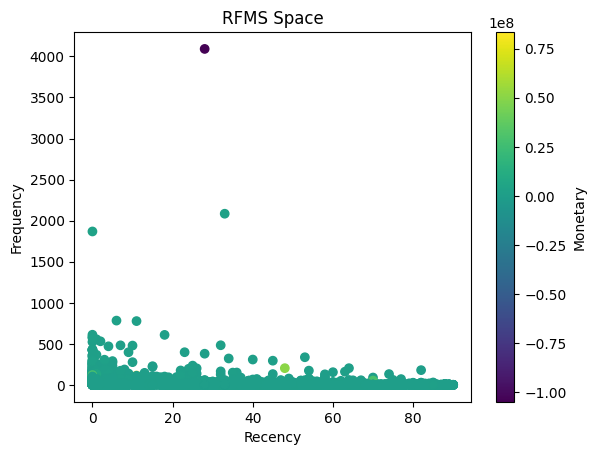

In [63]:
# Assuming you have a visualization library like matplotlib or seaborn installed
import matplotlib.pyplot as plt

# Scatter plot of RFMS scores
plt.scatter(rfms_df['Recency'], rfms_df['Frequency'], c=rfms_df['Monetary'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFMS Space')
plt.colorbar(label='Monetary')
plt.show()

In [49]:
!pip install scorecardpy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60663 sha256=fb83e34779feb70b3e2a527580edc36443e2b85ca4d1906ae12dbf209803ab24
  Stored in directory: c:\users\hello\appdata\local\pip\cache\wheels\9f\d8\4e\61a6f4e78fe6700f66b699ab38377f0aa5b33e3ef55751ba38
Successfully built scorecardpy


In [64]:
# You can visually inspect the RFMS scatter plot to find a boundary, or use statistical methods like clustering
# For simplicity, let's assume you visually identified a boundary: Recency > 50, Frequency > 5, Monetary > 100, Size > 0.5

# Example code to establish boundary
rfms_df['label'] = 'good'  # Initialize all labels as 'good'
rfms_df.loc[(rfms_df['Recency'] > 50) | (rfms_df['Frequency'] > 5) | (rfms_df['Monetary'] > 100) | (rfms_df['Size'] > 0.5), 'label'] = 'bad'


In [66]:
# Example code for WoE binning
from scorecardpy import woebin

# WoE binning
bins = woebin(rfms_df, y="label")

# Print the bins
bins

[INFO] creating woe binning ...


c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-06_Bati_Bank\venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-06_Bati_Bank\venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-06_Bati_Bank\venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_

{'Monetary':    variable         bin  count  count_distr  good   bad   badprob       woe  \
 0  Monetary  [-inf,0.0)    192     0.051309    90   102  0.531250 -3.501238   
 1  Monetary   [0.0,inf)   3550     0.948691     7  3543  0.998028  2.600418   
 
      bin_iv  total_iv breaks  is_special_values  
 0  3.150594  5.490584    0.0              False  
 1  2.339990  5.490584    inf              False  ,
 'RFMS_score':      variable         bin  count  count_distr  good   bad   badprob  woe  \
 0  RFMS_score  [-inf,inf)   3742          1.0    97  3645  0.974078  0.0   
 
    bin_iv  total_iv breaks  is_special_values  
 0     0.0       0.0    inf              False  ,
 'CustomerId':      variable              bin  count  count_distr  good   bad   badprob  \
 0  CustomerId    [-inf,4400.0)   2988     0.798503    54  2934  0.981928   
 1  CustomerId  [4400.0,5000.0)    432     0.115446     5   427  0.988426   
 2  CustomerId     [5000.0,inf)    322     0.086050    38   284  0.881988   
 

**The other alternative way for WOE Binning**

In [47]:
%pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 335.2 kB/s eta 0:00:33
   - -------------------------------------- 0.5/11.5 MB 335.2 kB/s eta 0:00:33
  

In [ ]:
# WoE Binning
data['FraudResult'] = data['FraudResult'].astype(int)
X = data[['Recency', 'Frequency', 'Monetary', 'Seasonality']]
y = data['FraudResult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

woe = WOE()
woe.fit(X_train, y_train)
X_train_woe = woe.transform(X_train)
X_test_woe = woe.transform(X_test)

woe_iv = woe.woe_iv_df
print(woe_iv)

# Train and evaluate model
model = LogisticRegression()
model.fit(X_train_woe, y_train)
y_pred = model.predict(X_test_woe)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

In [58]:
# Set thresholds based on percentiles for Recency, Frequency, Monetary
recency_threshold_good = data['Recency'].quantile(0.25)  # 25th percentile
recency_threshold_bad = data['Recency'].quantile(0.75)   # 75th percentile
frequency_threshold_good = data['Frequency'].quantile(0.75)
frequency_threshold_bad = data['Frequency'].quantile(0.25)
monetary_threshold_good = data['Monetary'].quantile(0.75)
monetary_threshold_bad = data['Monetary'].quantile(0.25)

# Create a new column to label "good", "bad", or "average"
def classify_customer(row):
    if row['Recency'] <= recency_threshold_good and row['Frequency'] >= frequency_threshold_good and row['Monetary'] >= monetary_threshold_good:
        return 'good'
    elif row['Recency'] >= recency_threshold_bad and row['Frequency'] <= frequency_threshold_bad and row['Monetary'] <= monetary_threshold_bad:
        return 'bad'
    else:
        return 'average'

data['RFMS_Class'] = data.apply(classify_customer, axis=1)


In [59]:
data['RFMS_Class']

0        average
1        average
2            bad
3        average
4        average
          ...   
95657       good
95658    average
95659    average
95660       good
95661       good
Name: RFMS_Class, Length: 95662, dtype: object